# 主成分分析(PCA)とは

データセットの次元が多いと、データ分析においても、機械学習においても計算コストが増え、データの様子が分かりにくくなります。

その解決策として、統計や機械学数の分野でよく使われる手法が、主成分分析（Principal Component Analysis：PCA）です。

主成分分析では、特徴量を抽出することによって、データセット内の特徴量を削減することが出来ます。

それによって、3次元以下に次元を削減することが出来れば、データを可視化することもできます。

別章「pandasの前処理・整形」で扱った特徴量削減方法では、元の特徴量は何の変換もされることなく、

特徴量はそのままの形式を保たれていました。

しかし、主成分分析では、特徴量を「選択」するものではなく、新しい特徴量を「抽出」します。

ただし、ここでいう「抽出」とは非可逆的な（一度抽出したら、元のデータセットの特長量には戻らない）ものなので、いくらか失われる情報が出てきます。

# 主成分分析を理解する
主成分分析とは、データセットの次元を削減するために用いる手法ですが、主成分分析をした後の次元数を何個にしなければならない、といった規定はありません。

なので、極論をいってしまえば、主成分分析を行った後の次元数が元のデータセットと同じ次元数でも問題は無いのです。

それでは次元削減できていないではないか、と感じる人も多くいるかもしれませんが、

イメージでいえば主成分分析では、次元の重要でないものを消すことも、消さないこともできるといったものです。

数多くある次元数の中から、「重要な次元」のみをピックアップすれば、次元を減らすことが出来ます。

主成分分析は教師なし学習なので、正解（ラベルや教師データ）がないため、分散によって次元の重要度を決めます。

分散は、データのばらつきを表す指標の一つなので、分散が大きければ大きいだけデータのバラつきは大きく、

分散が小さければ小さいだけデータのバラつきが小さいといえます。

すなわち、分散が大きければデータの値ごとの差も見つけやすく、分散が小さければ、データの値ごとの差が見つけにくいといえます。

よって、一番初めに新しく抽出する次元は、その次元に射影したデータの分散が最大になるように作成します。

たとえば、まず2次元のデータを考えるために、下のようなy=2x+1の一次関数を考えましょう。

プロットする点は (2,5),(3,7),(5,11),(7,15) で、これらの点をx軸y軸に射影してそれぞれの分散を求めます。

<img src = "PCA_1.png">

まず主成分分析をする前の分散について考えます。上の図のようにデータをx軸に射影したときの分散は3.69, y軸に射影したときの分散は14.75です。

さらに、設定した関数から、(2,5),(3,7),(5,11),(7,15)が相関していることは明らかです。

ここで、2次元から1次元への圧縮を考えます。新しい次元Z1は、以下のようなものです。

<img src= "PCA_2.png">

新しく抽出した次元に射影したデータの分散は、x軸やy軸へデータを射影した時よりも間隔（バラつき）が大きいため、分散が大きいことが分かります。

さらに、この次元に直行する新しい次元についても考えてみましょう。

<img src = "PCA_3.png">

この次元では、すべてのデータの間隔（バラつき）が０なので、情報が全く含まれていないことが分かります。

主成分分析とは、このような作業によって、2次元を1次元に抽出する作業の事をさします。

# Scikit-learnを用いた主成分分析
先ほどのような主成分分析は、Pythonではどのように実装できるのでしょうか。

実際に、打ち込んでみましょう。

次のコードでは、y=2x+1上の (2,5),(3,7),(5,11),(7,15) 

のデータを主成分分析して、分析結果したものの散布図を表示します。

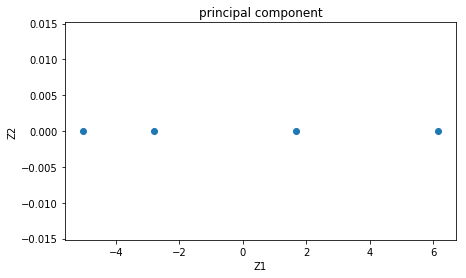

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# グラフ描画サイズを設定する
plt.figure(figsize=(7,4))

#y = 2x + 1
features = np.array([[2, 5], [3, 7], [5, 11], [7, 15]])

# 主成分分析をする
pca = PCA()
pca.fit(features)

# データセットを主成分に変換する
transformed = pca.fit_transform(features)

# 主成分をプロットする
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principal component')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.savefig('PCA_sample1')
plt.show()

# 第一主成分と、第二主成分

以上によって、主成分分析の概念は説明しましたが、多くのデータはy=2x+1のような一次関数上にあるわけではありません。

基本的にはデータセットには、分散が含まれていて一つの次元に収めることは出来ません。そういったときには幾つかの主成分を考えること求められます。

今回の主成分に最初に選ばれたZ1軸のような、射影したデータの分散が最大になるような軸を__第一主成分__といい、

第一主成分と直行する軸の中で、
軸上に射影したデータの分散が最大になる軸を__第二主成分__といいます。

ここで少しだけ、どのように主成分分析がScikit-Learnの中で行われているか、線形代数を用いてざっくりと手順を説明しておきます。

ただし、Scikit-Learnを用いれば数行で書くことが出来ます。

よって、Scikit-Learnによる主成分分析を使えれば良いという人は、この手順について深く理解する必要はありません。

1. 変数x1, x2, x3, ・・・, xpを標準化する
<img src = "PCA_4.png">

2. 第１主成分z1を以下のように定める
<img src = "PCA_5.png">

3. z１の分散Vz1が最大になる[a1, a2, ･･･, ap]を求める。その解は各データの
    x1, x2, x3, ,,,xpの相関行Rとすと、
<img src = "PCA_6.png">　であり、第一固有値(最大固有値)λ1に対応する長さ1の固有ベクトルとなる。このときVz1 = λ1となる。


4.  第2主成分はRの第2固有値λ2に対応する長さ1の固有ベクトルとなる。このときVz2=λ2


5. 第k主成分は第k固有値に対応する（長さ1の）固有ベクトルとして求める事が出来る。

この手順にのっとって第k主成分は、原理的には元の次元数pと同じ数まで増やすことが出来ます。

# 主成分分析の評価方法(累積寄与率)

原理的には元のデータの次元数まで増やすことのできる主成分ですが、いくつの主成分を採用すればよいのでしょうか。

一般的に累積寄与率が80%となるよう、主成分を抽出すると良いとされています。

ただし、この80％という数字はきちんと定められたものではなく、60％で言いという人もいます。

なので、どの主成分を使うべきかについては、それぞれの分析者によって定められます。

第k主成分の寄与率の定義式は以下の通りです。

<img src = "PCA_7.png">

また、第k主成分までの累積寄与率を

<img src = "PCA_8.png">

と定義する。

実際に、先ほどのy=2x+1の一次関数上に取った点での、各成分での寄与率と累積寄与率は、
explained_variance_ratio_　メソッドを使うことで、計算することが出来る。

In [13]:
print('各次元の寄与率：{0}'.format(pca.explained_variance_ratio_))
print('累積寄与率：{0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率：[  1.00000000e+00   1.60324863e-35]
累積寄与率：1.0


# 実装例

実際に、どのように主成分分析が活用できるのか、今回はIrisデータセットを用いて考えてみましょう。

Iris（アヤメ）データセットとは、“setosa”, “versicolor”, “virginica” という 3 種類の品種のアヤメのがく片 (Sepal)、花弁 (Petal) の幅および長さを計測したデータです。

アイリスデータセットには150個のデータがあり、3種類のアヤメのデータがあるので、4次元のデータという事になります。

今回これら４次元のデータに関して主成分分析をすることで、2次元の第一主成分と第二主成分に抽出をし、可視化をします。

さらにそれらの累積寄与率を調べたいと思います。

まずはデータの読み込みをします

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.cm as cm

#データセットの読み込み
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# 主成分分析前のサイズ
print(X.shape)

(150, 4)


Irisデータセットは3種類の150個のデータがある4次元のデータセットなので、出力は(150, 4)となります。
続いて、主成分分析によって、2次元に変換してみます。

In [16]:
# 主成分分析による次元削減
pca = PCA(n_components = 2, whiten = False)
pca.fit(X)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(150, 2)


変換後にはIrisデータセットは150個のデータがある2次元のデータセットとなっているので、出力は(150, 2)となります。
さらに、このデータは2次元のデータなので、matplotlibを用いることで、これらを可視化することが出来ます。

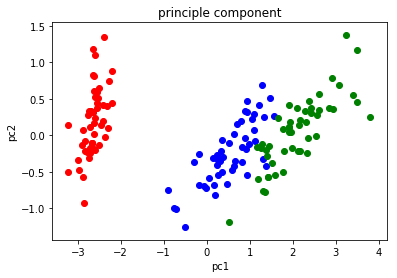

In [17]:
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(X)

#主成分をプロットする
#花の種類別で色を変える
for label in np.unique(Y):
    if label == 0:
        c = 'red'
    elif label == 1:
        c = "blue"
    elif label == 2:
        c = "green"
    else:
        pass
    plt.scatter(transformed[Y == label, 0],
                transformed[Y == label, 1],
                c=c)
plt.title("principle component")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

今回は第二主成分まで考えましたが、この累積寄与率を調べます。

累積寄与率が80％を大幅に超えているため、主成分分析の基準を満たしていると
考えられます。

In [19]:
# 主成分の寄与率を出力します
print('各次元の寄与率：{0}'.format(pca.explained_variance_ratio_))
print('累積寄与率：{0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率：[ 0.92461621  0.05301557]
累積寄与率：0.9776317750248034


# まとめ
Scikit-learnを活用した主成分分析を行いました。

まとめとして、Scikit-learnを用いた時の主成分分析の流れは以下の通りです。

１．主成分分析で次元削減を行う。

２．分析結果をもとに、データセットを主成分に変換する

３．主成分をプロットする

４．主成分の寄与率で基準を満たしているか評価する

ここでは、主成分の寄与率で、第k主成分の累積寄与率が80％であれば基準を満たすという表現をしましたが、その評価方法はケースバイケースで変化するので注意してください。

また、主成分分析の詳しいアルゴリズムについては、以下のURLが有効です。
30分で分かる次元削減https://qiita.com/aya_taka/items/4d3996b3f15aa712a54f

# 演習問題
（１）分散共分散行列が[[2, 7], [4, 5]]
となるようなサンプルを2次元で200個ランダムに発生させるコードは以下の通りである。このコードを記述してください。

C:\Users\masayoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


[[-1.61044563  1.93663401]
 [ 0.63498052 -0.64393159]
 [ 0.35251243 -0.21427241]
 [ 0.40412757 -1.15713488]
 [-2.92459783 -5.10495999]
 [ 2.67352406  5.71984551]
 [ 1.40219816  6.72959108]
 [ 0.04721249  1.39887377]
 [ 4.22524866  3.57208642]
 [ 1.13326446  4.73848873]]


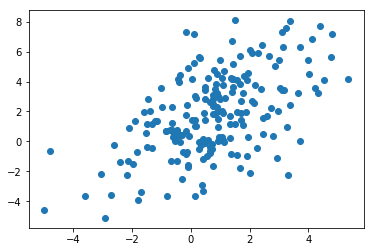

In [36]:
import numpy as np
cov = np.array([[2, 7], [4, 5]])
X = np.random.multivariate_normal([1, 2], cov, size = 200)

# (2)ランダムに発生させたデータを上から10個表示せよ
print(X[0:10, :])

#　(3)ランダムに発生させたデータをプロットせよ
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:, 1])

In [40]:
#(4) ランダムに発生させたデータの主成分分析をして、データセットを主成分に変換せよ
from sklearn.decomposition import PCA

print('Xのサイズ：',X.shape)

# 主成分分析による次元削減
pca = PCA(n_components = 1, whiten = False)
pca.fit(X)
X_pca = pca.transform(X)
print('次元削減後のサイズ',X_pca.shape)

Xのサイズ： (200, 2)
次元削減後のサイズ (200, 1)


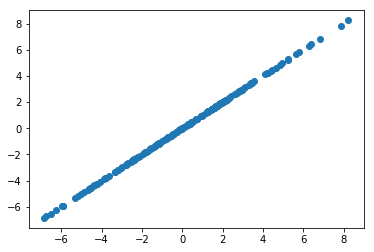

In [46]:
# 主成分をプロットせよ
plt.scatter(X_pca[:, 0], X_pca[:,0])

In [47]:
# (6)各主成分の寄与率を出力し、累積寄与率を求める
print('各次元の寄与率：{0}'.format(pca.explained_variance_ratio_))
print('累積寄与率：{0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率：[ 0.82402199]
累積寄与率：0.8240219907391141


# 以下、模範回答

C:\Users\masayoshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


[[-0.44384312  3.84457796]
 [-2.0985293   3.52782816]
 [ 0.29984883 -0.71402943]
 [ 3.26515064  6.02167373]
 [ 1.62227772 -2.009106  ]
 [-1.41447112 -0.21101094]
 [ 2.5586161   5.68846871]
 [-1.12309183 -3.90535727]
 [ 1.94155687  0.99995835]
 [ 1.59599005  4.09178108]]


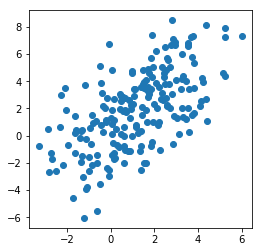

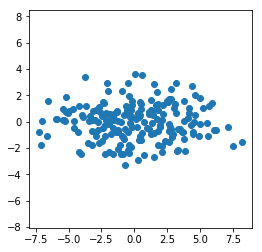

各次元の寄与率: [ 0.84440981  0.15559019]
累積寄与率: 1.0


In [48]:
import numpy as np
Cov = np.array([[2, 7], [4, 5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)  

print(X[:10,:])

import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.show()

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.axis('equal')
plt.show()

print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))